In [1]:
import matplotlib.pyplot as plt

In [3]:
from __future__ import annotations

import argparse
import itertools
import os.path
from typing import NamedTuple
from collections import defaultdict, deque
from enum import Enum
from pprint import pprint
from functools import lru_cache

import pytest

import support

INPUT_TXT = 'input.txt'


class Point(NamedTuple):
    x: int
    y: int
    

class Segment(NamedTuple):
    type: str
    rng: range
    anchor: int

def rect_area(a: Point, b: Point) -> int:
    return (1 + abs(a.x - b.x)) * (1 + abs(a.y - b.y))

def rect_points(a: Point, b: Point) -> tuple[Point, Point]:
    
    if b.x >= a.x:
        return Point(a.x, b.y), Point(b.x, a.y)
    else:
        return Point(b.x, a.y), Point(a.x, b.y)
    
        
def get_segment(a: Point, b: Point) -> Segment:
    if a.x == b.x:
        if a.y > b.y:
            return Segment(type='v', anchor=a.x, rng=range(b.y, a.y + 1))
        else:
            return Segment(type='v', anchor=a.x, rng=range(a.y, b.y + 1))
    elif a.y == b.y:
        if a.x > b.x:
            return Segment(type='h', anchor=a.y, rng=range(b.x, a.x + 1))
        else:
            return Segment(type='h', anchor=a.y, rng=range(a.x, b.x + 1))
    else:
        raise ValueError

def compute(s: str) -> int:
    lines = s.splitlines()
    points = []
        
    for line in lines:
        points.append(Point(*map(int, line.split(','))))
    
    segments: defaultdict[str, list[Segment]] = defaultdict(list)
    segs = []  
    
    def get_dirs(p1: Point, p2: Point, dirs: list = []) -> list[str]:
        if p2.x == p1.x:
            if p2.y >= p1.y:
                # below
                dirs.append('d')
            else:
                dirs.append('u')
        elif p2.y == p1.y:
            if p2.x >= p1.x:
                # right
                dirs.append('r')
            else:
                dirs.append('l')
        
        return dirs
        
    dirs = []
    
    for a, b in itertools.pairwise(points):
        seg = get_segment(a, b)
        segs.append(seg)
        if seg.type == 'h':
            segments['h'].append(seg)
        else:
            segments['v'].append(seg)
        
        dirs = get_dirs(a, b)
        
    
    dirs = get_dirs(points[-1], points[0])
    dirs = get_dirs(points[0], points[1])
    
    turns = []
    for d1, d2 in itertools.pairwise(dirs):
        if (d1, d2) == ('u', 'r'):
            turns.append('F')
        elif (d1, d2) == ('u', 'l'):
            turns.append('7')
        elif (d1, d2) == ('d', 'l'):
            turns.append('J')
        elif (d1, d2) == ('d', 'r'):
            turns.append('L')
        elif (d1, d2) == ('l', 'u'):
            turns.append('L')
        elif (d1, d2) == ('l', 'd'):
            turns.append('F')
        elif (d1, d2) == ('r', 'u'):
            turns.append('J')
        elif (d1, d2) == ('r', 'd'):
            turns.append('7')
        else:
            raise ValueError
        
    turns = [turns[-1]] + turns[:-1]
    
    last_seg = get_segment(points[-1], points[0])
    segs.append(last_seg)
    if last_seg.type == 'h':
        segments['h'].append(last_seg)
    else:
        segments['v'].append(last_seg)
    
    coords = {
        (x, y): '.'
        for y in range(9)
        for x in range(15)
    }
    
    corners = {}
    for i, pt in enumerate(points):
        coords[(pt.x, pt.y)] = turns[i]
        corners[(pt.x, pt.y)] = turns[i]
    
    
    breakpoint()
    valid_rects = []
    
    
    print()
    support.print_coords(coords)
    
    
    for a, b in itertools.combinations(points, r=2):
        other_points = [pt for pt in rect_points(a, b) 
                        if a != b and pt not in points]
        
        is_valid = all(inside_loop(pt, points, segments) for pt in other_points)
        if is_valid:
            valid_rects.append((a, b))
    
    return max(
        rect_area(a, b)
        for a, b in valid_rects
    )


INPUT_S = '''\
7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
'''
EXPECTED = 24


@pytest.mark.parametrize(
    ('input_s', 'expected'),
    (
        (INPUT_S, EXPECTED),
    ),
)
def test(input_s: str, expected: int) -> None:
    assert compute(input_s) == expected


def main() -> int:
    parser = argparse.ArgumentParser()
    parser.add_argument('data_file', nargs='?', default=INPUT_TXT)
    args = parser.parse_args()

    with open(args.data_file) as f, support.timing():
        print(compute(f.read()))

    return 0

In [7]:
INPUT_S = '''\
7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
'''

In [190]:
with open('input.txt', 'r') as f:
    INPUT_S = f.read()
    
lines = INPUT_S.splitlines()
points = []
    
for line in lines:
    points.append(Point(*map(int, line.split(','))))

segments: defaultdict[str, list[Segment]] = defaultdict(list)
segs = []  

In [191]:
segs = []
for a, b in itertools.pairwise(points):
    seg = get_segment(a, b)
    segs.append(seg)
    if seg.type == 'h':
        segments['h'].append(seg)
    else:
        segments['v'].append(seg)
last_seg = get_segment(points[-1], points[0])
segs.append(last_seg)

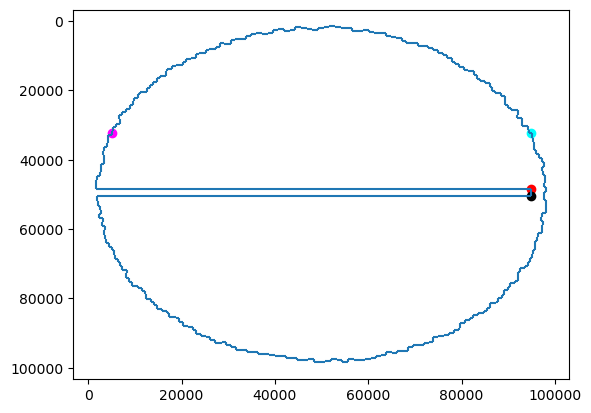

In [226]:
fig, ax = plt.subplots(1, 1)

for seg in segs:
    if seg.type == 'h':
        ax.hlines(y=seg.anchor, xmin=seg.rng.start, xmax=seg.rng.stop - 1)
    else:
        ax.vlines(x=seg.anchor, ymin=seg.rng.start, ymax=seg.rng.stop - 1)

# ax.set_ylim((50_400, 50_405))
# plt.scatter(24_067, 18_000, c='red')
# plt.scatter(80_000, 44_000)

# plt.scatter(73052, 92965)
# plt.scatter(1803, 50402, c='red')
# plt.scatter(1803, 92965, c='green')
# plt.scatter(73052, 50402, c='orange')

# plt.scatter(2454, 43551, c='blue')
# plt.scatter(2454, 48336)
# plt.scatter(94858, 43551)

plt.scatter(94858, 48336, c='red')
plt.scatter(94_858, 32436, c='cyan')
plt.scatter(5003, 32436, c='magenta')

plt.scatter(94858, 50402, c='black')
# [Segment(type='v', rng=range(47116, 48337), anchor=1550)]
# [Segment(type='v', rng=range(31659, 32875), anchor=5003),

# plt.xlim(2000, 4000)
# plt.ylim(47000, 49000)
ax.invert_yaxis()

# for pt in points:
#     plt.scatter(pt.x, pt.y, c='orange')

plt.show()

In [118]:
[p for p in points if p.y == 48_336]

[Point(x=94858, y=48336), Point(x=1550, y=48336)]

In [162]:
# [p for p in points if p.x == 94858 and p.y < 48_336]
[s for s in segments['h'] if 94_858 in s.rng and s.anchor < 48_336], [s for s in segments['v'] if 48_336 in s.rng]

([Segment(type='h', rng=range(94384, 95141), anchor=32436)],
 [Segment(type='v', rng=range(48336, 50403), anchor=94858),
  Segment(type='v', rng=range(47116, 48337), anchor=1550),
  Segment(type='v', rng=range(47993, 49222), anchor=98085)])

In [155]:
[(s, s.rng) for s in segments['v']]

[]

In [147]:
[p for p in points if p.x == 94858 and p.y < 48_336]

[]

In [119]:
[p for p in points if p.x == 94858]

[Point(x=94858, y=50402), Point(x=94858, y=48336)]

In [121]:
[p for p in points if p.y == 50_402]

[Point(x=1803, y=50402), Point(x=94858, y=50402)]

In [ ]:
# for a, b in itertools.combinations(points, r=2):
#         other_points = [pt for pt in rect_points(a, b) 
#                         if a != b and pt not in points]

In [164]:
[s for s in segments['h'] if 94_858 in s.rng and s.anchor < 48_336], [s for s in segments['v'] if 48_336 in s.rng]

([Segment(type='h', rng=range(94384, 95141), anchor=32436)],
 [Segment(type='v', rng=range(48336, 50403), anchor=94858),
  Segment(type='v', rng=range(47116, 48337), anchor=1550),
  Segment(type='v', rng=range(47993, 49222), anchor=98085)])

In [195]:
[s for s in segments['h'] if 94_858 in s.rng and s.anchor < 48_336]

[Segment(type='h', rng=range(94384, 95141), anchor=32436)]

In [196]:
[s for s in segments['v'] if s.anchor == 94858]

[Segment(type='v', rng=range(48336, 50403), anchor=94858)]

In [197]:
[s for s in segments['h'] if s.anchor == 32436]

[Segment(type='h', rng=range(94384, 95141), anchor=32436)]

In [199]:
[s for s in segments['v'] if 32436 in s.rng]

[Segment(type='v', rng=range(31659, 32875), anchor=5003),
 Segment(type='v', rng=range(31423, 32437), anchor=94384),
 Segment(type='v', rng=range(32436, 33716), anchor=95140)]

In [206]:
# plt.scatter(94858, 48336, c='red')
# plt.scatter(94_858, 32436, c='cyan')
# plt.scatter(5003, 32436, c='magenta')

tr = Point(94_858, 32436)
br = Point(94858, 48336)
tl = Point(5003, 32436)

In [213]:
dx = abs(tr.x - tl.x) + 1
dy = abs(tr.y - br.y) + 1

dx, dy

(89856, 15901)

In [214]:
# top hemisphere
dx * dy

1428800256

In [218]:
# bottom hemisphere

[s for s in segments['h'] if 94_858 in s.rng and s.anchor > 50_402]


[Segment(type='h', rng=range(94683, 95030), anchor=68315)]

In [220]:
[s for s in segments['h'] if s.anchor == 68315]

[Segment(type='h', rng=range(94683, 95030), anchor=68315)]

In [221]:
[s for s in segments['v'] if 68315 in s.rng]

[Segment(type='v', rng=range(67138, 68316), anchor=95029),
 Segment(type='v', rng=range(68315, 69399), anchor=94683),
 Segment(type='v', rng=range(67350, 68527), anchor=5736)]

In [232]:
tr2 = Point(94_858, 50_402)
br2 = Point(94_858, 68315)
bl2 = Point(5736, 68315)

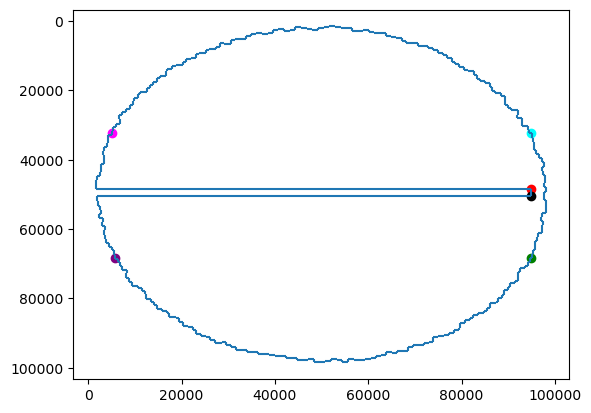

In [259]:
fig, ax = plt.subplots(1, 1)

for seg in segs:
    if seg.type == 'h':
        ax.hlines(y=seg.anchor, xmin=seg.rng.start, xmax=seg.rng.stop - 1)
    else:
        ax.vlines(x=seg.anchor, ymin=seg.rng.start, ymax=seg.rng.stop - 1)

# ax.set_ylim((50_400, 50_405))
# plt.scatter(24_067, 18_000, c='red')
# plt.scatter(80_000, 44_000)

# plt.scatter(73052, 92965)
# plt.scatter(1803, 50402, c='red')
# plt.scatter(1803, 92965, c='green')
# plt.scatter(73052, 50402, c='orange')

# plt.scatter(2454, 43551, c='blue')
# plt.scatter(2454, 48336)
# plt.scatter(94858, 43551)

plt.scatter(94858, 48336, c='red')
plt.scatter(94_858, 32436, c='cyan')
plt.scatter(5003, 32436, c='magenta')

plt.scatter(tr2.x, tr2.y, c='black')
plt.scatter(br2.x, br2.y, c='green')
plt.scatter(bl2.x, bl2.y, c='purple')
# [Segment(type='v', rng=range(47116, 48337), anchor=1550)]
# [Segment(type='v', rng=range(31659, 32875), anchor=5003),


# ax.set_xlim(5736-3, 5736+3)
# ax.set_ylim(68315 - 2000, 68315 + 2000)
ax.invert_yaxis()


# for pt in points:
#     plt.scatter(pt.x, pt.y, c='orange')

plt.show()

In [261]:
tr2 = Point(94_858, 50_402)
br2 = Point(94_858, 68315)
bl2 = Point(5736, 68315)

dx = abs(br2.x - bl2.x) + 1
dy = abs(br2.y - tr2.y) + 1

dx, dy, dx * dy

(89123, 17914, 1596549422)

In [264]:
a = Point(94_858, 50_402)
b = Point(94_858, 50_402)
c = Point(5736, 50_402)

dx = abs(a.x - c.x) + 1
dy = abs(a.y - b.y) + 1

dx, dy, dx * dy

(89123, 1, 89123)

In [265]:
[s for s in segments['v'] if s.anchor == 94_858]

[Segment(type='v', rng=range(48336, 50403), anchor=94858)]

In [267]:
[s for s in segments['h'] if 94_858 in s.rng]

[Segment(type='h', rng=range(94683, 95030), anchor=68315),
 Segment(type='h', rng=range(1803, 94859), anchor=50402),
 Segment(type='h', rng=range(1550, 94859), anchor=48336),
 Segment(type='h', rng=range(94384, 95141), anchor=32436)]

In [268]:
[s for s in segments['v'] if 68315 in s.rng]

[Segment(type='v', rng=range(67138, 68316), anchor=95029),
 Segment(type='v', rng=range(68315, 69399), anchor=94683),
 Segment(type='v', rng=range(67350, 68527), anchor=5736)]

In [270]:
[s for s in segments['h'] if s.anchor == 68315]

[Segment(type='h', rng=range(94683, 95030), anchor=68315)]

(94600.0, 95100.0)

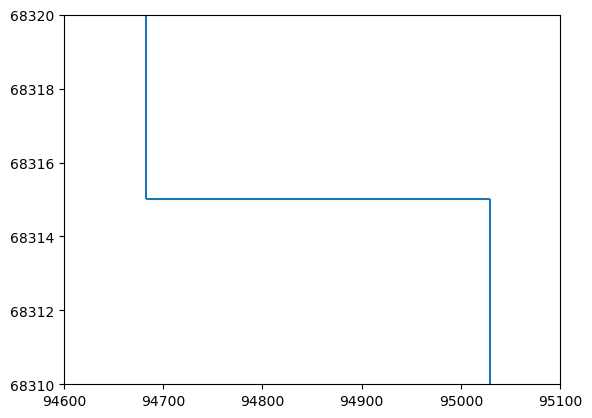

In [272]:
fig, ax = plt.subplots(1, 1)

for seg in segs:
    if seg.type == 'h':
        ax.hlines(y=seg.anchor, xmin=seg.rng.start, xmax=seg.rng.stop - 1)
    else:
        ax.vlines(x=seg.anchor, ymin=seg.rng.start, ymax=seg.rng.stop - 1)

ax.set_ylim(68315 - 5, 68315 + 5)
ax.set_xlim(94600, 95100)

In [314]:
import plotly.express as px
fig = px.scatter(x=[p.x for p in points], y=[p.y for p in points], width=700, height=700)
fig.add_hline(y=60_000)


fig.update_yaxes(autorange='reversed')
fig.show(renderer='browser')

In [425]:
import plotly.graph_objects as go

fig = go.Figure()

a = Point(94_858, 50_402)
b = Point(94_858, 68315)
c = Point(5736, 68315)
d = Point(5736, 50_402)


fig.add_scatter(x=[p.x for p in points] + [points[0].x], y=[p.y for p in points] + [points[0].y])
# fig.add_shape(type="rect",
#     x0=5736, y0=50_402, x1=94_858, y1=68315,
#     line=dict(color="RoyalBlue"),
#     fillcolor='red',
#     opacity=0.4
# )

# fig.add_shape(type="rect",
#     x0=5003, y0=32436, x1=94_858, y1=48336,
#     line=dict(color="RoyalBlue"),
#     fillcolor='purple',
#     opacity=0.4
# )

fig.add_shape(type="rect",
    x0=4315, y0=32_874, x1=PTUP.x, y1=PTUP.y,
    line=dict(color="RoyalBlue"),
    fillcolor='orange',
    opacity=0.4
)

fig.add_shape(type="rect",
    x0=5404, y0=67350, x1=PTDN.x, y1=PTDN.y,
    line=dict(color="RoyalBlue"),
    fillcolor='pink',
    opacity=0.4
)

# Point(x=4315, y=32874)
# Point(x=5736, y=67350)




# plt.scatter(94858, 48336, c='red')
# plt.scatter(94_858, 32436, c='cyan')
# plt.scatter(5003, 32436, c='magenta')

fig.update_yaxes(autorange='reversed')
fig.show(renderer='browser')

In [350]:
Point(94_858, 50_402) in points

False

In [396]:
YUP = 48336
YDN = 50_402

PTUP = Point(94_858, 48_336)
PTDN = Point(94_858, 50_402)

subset_up = [p for p in points if 32_436 <= p.y <= YUP and p.x <= 5003]

In [405]:
max_x = 1550
valid_pts_up = []
for p in subset_up:
    if p.x >= max_x:
        valid_pts_up.append(p)
        max_x = p.x

In [406]:
for vp in valid_pts_up:
    print(vp, rect_area(vp, PTUP))

Point(x=1550, y=48336) 93309
Point(x=1550, y=47116) 113930289
Point(x=1714, y=47116) 113730045
Point(x=1714, y=45907) 226342350
Point(x=1961, y=45907) 225742140
Point(x=1961, y=44733) 334804392
Point(x=2454, y=44733) 333027620
Point(x=2454, y=43551) 442250330
Point(x=2758, y=43551) 440795386
Point(x=2758, y=42319) 554263818
Point(x=3307, y=41197) 653681280
Point(x=3307, y=39991) 764092992
Point(x=3423, y=39991) 763124856
Point(x=3423, y=38709) 880345808
Point(x=4061, y=36408) 1083129342
Point(x=4061, y=35208) 1192086942
Point(x=4297, y=35208) 1188988498
Point(x=4297, y=33925) 1305179544
Point(x=4315, y=33925) 1304920128
Point(x=4315, y=32874) 1400081872
Point(x=5003, y=32874) 1389443328


In [407]:
max(rect_area(vp, PTUP) for vp in valid_pts_up)

1400081872

In [408]:
sorted(valid_pts_up, key=lambda x: rect_area(x, PTUP))[-1]

Point(x=4315, y=32874)

In [401]:
# bottom hemisphere

In [403]:
subset_dn = [p for p in points if 68_315 >= p.y >= YDN and p.x <= 5736]

In [421]:
min_x = 1803
valid_pts_dn = []
for p in subset_dn[::-1]:
    if p.x >= min_x:
        valid_pts_dn.append(p)
        min_x = p.x

In [422]:
for vp in valid_pts_dn:
    print(vp, rect_area(vp, PTDN))

Point(x=1803, y=50402) 93056
Point(x=1803, y=50788) 36012672
Point(x=1922, y=50788) 35966619
Point(x=1922, y=52005) 149070948
Point(x=2028, y=52005) 148900924
Point(x=2028, y=53220) 261690589
Point(x=2516, y=53220) 260314917
Point(x=2516, y=54398) 369094971
Point(x=2798, y=54398) 367967817
Point(x=2798, y=55581) 476875980
Point(x=3104, y=56861) 592737300
Point(x=3104, y=57971) 694585350
Point(x=3591, y=59241) 806809120
Point(x=3591, y=60331) 906291240
Point(x=3844, y=62861) 1134046900
Point(x=3844, y=64027) 1240170390
Point(x=4482, y=64027) 1231477002
Point(x=4482, y=65103) 1328722654
Point(x=5111, y=65103) 1319475096
Point(x=5111, y=66168) 1415056716
Point(x=5404, y=66168) 1410436985
Point(x=5404, y=67350) 1516172795
Point(x=5736, y=67350) 1510545727


In [423]:
max(rect_area(vp, PTDN) for vp in valid_pts_dn)

1516172795

In [424]:
sorted(valid_pts_dn, key=lambda x: rect_area(x, PTDN))[-1]

Point(x=5404, y=67350)